<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U imbalanced-learn

In [178]:
import pydotplus
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from IPython.display import Image
from io import StringIO
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [203]:
df = pd.read_csv('/content/drive/MyDrive/Fatec/Aprendizado de Maquina/Tarefa 04 - Decision Tree/dataset_einstein.csv', delimiter=';')

df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [205]:
count_row = df.shape[0]
count_col = df.shape[1]

print('Total de registros: ', count_row)

Total de registros:  5644


In [206]:
df = df.dropna()

df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,negative,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,negative,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,negative,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


In [207]:
print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])

print('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])

Quantidade de campos(colunas):  11
Total de registros: 357
Total de registros negativos:  302
Total de registros positivos:  55


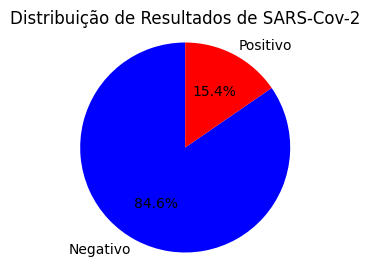

In [210]:
total_registros = df.shape[0]

negativos = df[df['SARS-Cov-2 exam result'] == 'negative'].shape[0]
positivos = df[df['SARS-Cov-2 exam result'] == 'positive'].shape[0]

porcentagem_negativos = (negativos / total_registros) * 100
porcentagem_positivos = (positivos / total_registros) * 100

rotulos = ['Negativo', 'Positivo']

cores = ['blue', 'red']
valores = [porcentagem_negativos, porcentagem_positivos]

plt.figure(figsize=(4, 3))
plt.pie(valores, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Resultados de SARS-Cov-2')
plt.axis('equal')

plt.show()

In [211]:
Y = df['SARS-Cov-2 exam result'].values
X = df[['Hemoglobin', 'Leukocytes', 'Basophils']].values

In [212]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3, stratify=Y)

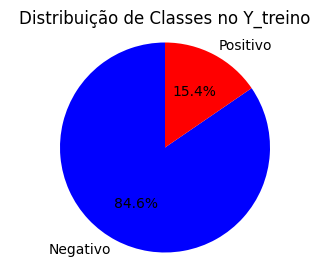

In [216]:
total_amostras = Y_treino.shape[0]

positivos = (Y_treino == 'positive').sum()
negativos = (Y_treino == 'negative').sum()

porcentagem_positivos = (positivos / total_amostras) * 100
porcentagem_negativos = (negativos / total_amostras) * 100

rotulos = ['Negativo', 'Positivo']
cores = ['blue', 'red']

valores = [porcentagem_negativos, porcentagem_positivos]

plt.figure(figsize=(4, 3))
plt.pie(valores, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Classes no Y_treino')
plt.axis('equal')

plt.show()

In [217]:
print('Total de registros:', X_treino[0])

print('Total de registros negativos: ', negativos)
print('Total de registros positivos: ', positivos)

Total de registros: [0.66687578 0.2476732  0.69261074]
Total de registros negativos:  241
Total de registros positivos:  44


In [188]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_treino, Y_treino)

In [218]:
smote_enn = SMOTEENN(random_state=0)
X_resampled2, y_resampled2 = smote_enn.fit_resample(X_treino, Y_treino)

In [190]:
ros = RandomOverSampler(random_state=0)
X_resampled3, y_resampled3 = ros.fit_resample(X_treino, Y_treino)

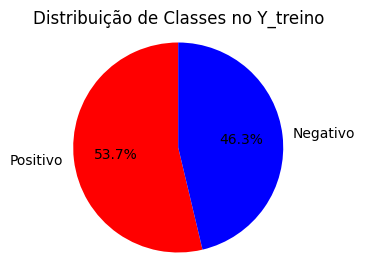

In [219]:
total_amostras = Y_treino.shape[0]

positivos = (y_resampled2 == 'positive').sum()
negativos = (y_resampled2 == 'negative').sum()

porcentagem_positivos = (positivos / total_amostras) * 100
porcentagem_negativos = (negativos / total_amostras) * 100

rotulos = ['Positivo', 'Negativo']
cores = ['red', 'blue']

valores = [porcentagem_positivos, porcentagem_negativos]

plt.figure(figsize=(4, 3))
plt.pie(valores, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Classes no Y_treino')
plt.axis('equal')

plt.show()

In [220]:
print('Total de registros:', X_treino[0])

print('Total de registros negativos: ', negativos)
print('Total de registros positivos: ', positivos)

Total de registros: [0.66687578 0.2476732  0.69261074]
Total de registros negativos:  168
Total de registros positivos:  195


In [221]:
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

modelo = algortimo_arvore.fit(X_resampled2, y_resampled2)

[0.10267519 0.63121655 0.26610827]


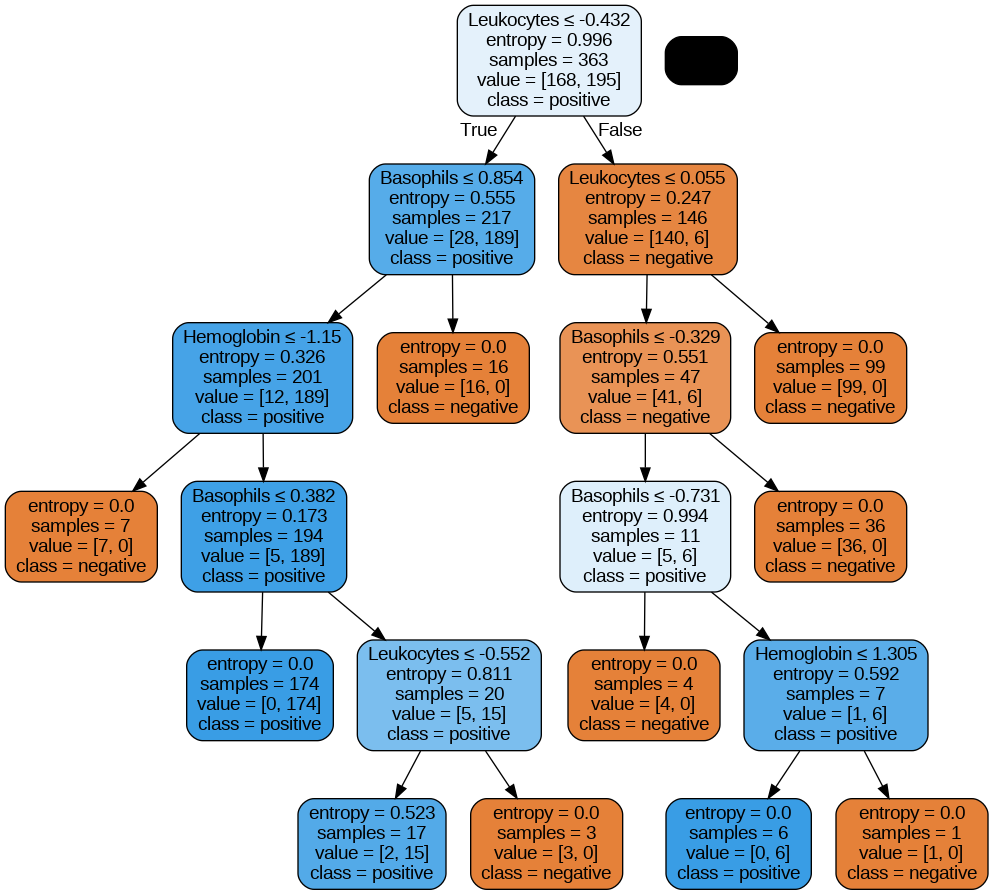

In [222]:
print (modelo.feature_importances_)

nome_features = ['Hemoglobin','Leukocytes', 'Basophils']
nome_classes = modelo.classes_

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

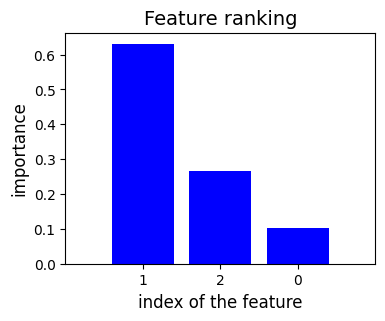

In [226]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(4, 3))
plt.title("Feature ranking", fontsize = 14)
plt.bar(range(X.shape[1]), importances[indices],
    color="b",
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 12)
plt.xlabel("index of the feature", fontsize = 12)
plt.show()

In [227]:
Y_predicoes = modelo.predict(X_teste)

print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print(classification_report(Y_teste, Y_predicoes))

ACURÁCIA DA ÁRVORE:  0.8194444444444444
              precision    recall  f1-score   support

    negative       0.93      0.85      0.89        61
    positive       0.44      0.64      0.52        11

    accuracy                           0.82        72
   macro avg       0.68      0.74      0.70        72
weighted avg       0.85      0.82      0.83        72



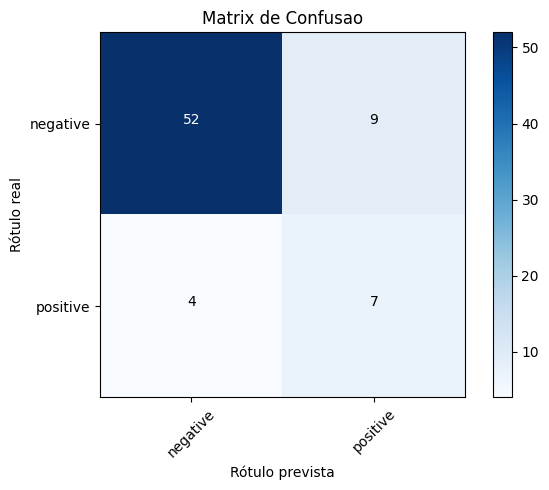

In [228]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes, title='Matrix de Confusao')